# Analysis about fuel cycle scenarios for HALEU fueled reactors

5 total fuel cycle scenarios are considered for this work:
* Scenario 1: Current US fuel cycle
* Scenario 2: No growth transition to USNC MMR 
* Scenario 3: No growth transition to X-energy Xe-100
* Scenario 4: 1% annual growth transition to USNC MMR
* Scenario 5: 1% annual growth transition to X-energy Xe-100

Results include the number of reactors 
deployed, total energy output, mass of enriched uranium, and the total SWU capacity 
required in each scenario. 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import cymetric as cym
from cymetric import timeseries
from cymetric import filters
from cymetric import tools

import transition_metrics as tm

In [3]:
current_outfile = '../outputs/united_states_2020.sqlite'
mmr_nogrowth_outfile = '../outputs/united_states_mmr_nogrowth.sqlite'
mmr_1percent_outfile = '../outputs/united_states_mmr_1percent.sqlite'
xe_nogrowth_outfile = '../outputs/united_states_xe100_nogrowth.sqlite'
xe_1percent_outfile = '../outputs/united_states_xe100_1percent.sqlite'

## Reactors Built and Decommissioned

This section plots the number of each reactor type in the simulation as a function of time

In [4]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'MMR_enter','MMR_exit']
xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'Xe-100']

In [5]:
current_reactors = tm.rx_commission_decommission(current_outfile, current_nonlwr)
current_reactors = tm.add_year(current_reactors)

mmr_nogrowth_reactors = tm.rx_commission_decommission(mmr_nogrowth_outfile, mmr_nonlwr)
mmr_nogrowth_reactors = tm.add_year(mmr_nogrowth_reactors)
mmr_nogrowth_reactors['mmr_total'] = (mmr_nogrowth_reactors['MMR_enter'] 
                                      + mmr_nogrowth_reactors['MMR_exit']).cumsum()

mmr_1percent_reactors = tm.rx_commission_decommission(mmr_1percent_outfile, mmr_nonlwr)
mmr_1percent_reactors = tm.add_year(mmr_1percent_reactors)
mmr_1percent_reactors['mmr_total'] = (mmr_1percent_reactors['MMR_enter'] 
                                      + mmr_1percent_reactors['MMR_exit']).cumsum()

xe_nogrowth_reactors = tm.rx_commission_decommission(xe_nogrowth_outfile, xe_nonlwr)
xe_nogrowth_reactors = tm.add_year(xe_nogrowth_reactors)
xe_nogrowth_reactors['xe_total'] = xe_nogrowth_reactors['Xe-100'].cumsum()

xe_1percent_reactors = tm.rx_commission_decommission(xe_1percent_outfile, xe_nonlwr)
xe_1percent_reactors = tm.add_year(xe_1percent_reactors)
xe_1percent_reactors['xe_total'] = xe_1percent_reactors['Xe-100'].cumsum()

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


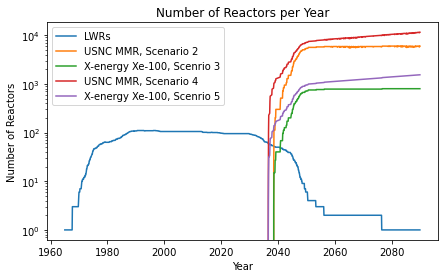

In [6]:
plt.figure(figsize=(7,4))
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='LWRs')
plt.plot(mmr_nogrowth_reactors['Year'], mmr_nogrowth_reactors['mmr_total'], label='USNC MMR, Scenario 2')
plt.plot(xe_nogrowth_reactors['Year'], xe_nogrowth_reactors['xe_total'], label='X-energy Xe-100, Scenrio 3')
plt.plot(mmr_1percent_reactors['Year'], mmr_1percent_reactors['mmr_total'], label='USNC MMR, Scenario 4')
plt.plot(xe_1percent_reactors['Year'], xe_1percent_reactors['xe_total'], label='X-energy Xe-100, Scenrio 5')
plt.title('Number of Reactors per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()
plt.savefig('figures/rx_deployment_all.png')

## Eletricity output

In [7]:
current_energy = tm.get_electricity(current_outfile)
mmr_nogrowth_energy = tm.get_electricity(mmr_nogrowth_outfile)
mmr_1percent_energy = tm.get_electricity(mmr_1percent_outfile)
xe_nogrowth_energy = tm.get_electricity(xe_nogrowth_outfile)
xe_1percent_energy = tm.get_electricity(xe_1percent_outfile)

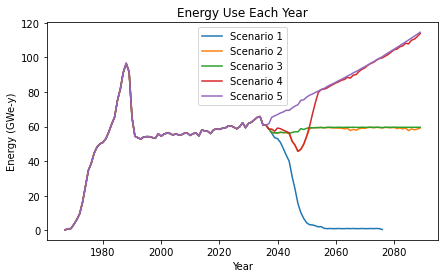

In [8]:
plt.figure(figsize=(7,4))
plt.plot(current_energy['Year'], current_energy['Energy'], label='Scenario 1')
plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'], label='Scenario 2')
plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'], label='Scenario 3')
plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'], label='Scenario 4')
plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'], label='Scenario 5')
plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('figures/energy_scenarios_all.png')

In [ ]:
#Provides level of electricity to set for transitions
current_energy['Energy'].loc[current_energy['Year'] == 2025]

### Compare number of reactors to energy output

In [ ]:
# Scenario 1
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(current_reactors['Year'], current_reactors['lwr_total'], label='LWR')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of reactors')
ax1.set_title('Number of reactors and energy produced in Scenario 1')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(current_energy['Year'], current_energy['Energy'], label='Energy', color='red')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_ylabel('Energy (MWe-y)')
#plt.savefig('figures/reactors_energy_scenario1.png')

In [ ]:
# Scenario 2
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(mmr_reactors['Year'], mmr_reactors['lwr_total'], label='LWR')
ax1.plot(mmr_reactors['Year'], mmr_reactors['mmr_total'], label='MMR')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of reactors')
ax1.set_title('Number of reactors and energy produced in Scenario 2')
ax1.legend()
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(mmr_energy['Year'], mmr_energy['Energy'], label='Energy', color='red')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_ylabel('Energy (MWe-y)')
#plt.savefig('figures/reactors_energy_scenario2.png')

In [ ]:
# Scenario 3
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(xe_reactors['Year'], xe_reactors['lwr_total'], label='LWR')
ax1.plot(xe_reactors['Year'], xe_reactors['xe_total'], label='Xe-100')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of reactors')
ax1.set_title('Number of reactors and energy produced in Scenario 3')
ax1.legend()
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(xe_energy['Year'], xe_energy['Energy'], label='Energy', color='red')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_ylabel('Energy (MWe-yr)')
#plt.savefig('figures/reactors_energy_scenario3.png')

### Electricity produced by each type of reactor

In [ ]:
# Scenario 1
lwr_energy = tm.get_lwr_energy(current_outfile, 'MMR')
plt.figure(figsize=(7,4))
plt.stackplot(lwr_energy['Year'], lwr_energy['Energy'], labels=['LWRs'])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (MWe-yr)')
plt.savefig('figures/energy_scenario1.png')

In [ ]:
# Scenario 2
mmr_energy = tm.get_prototype_energy(mmr_nogrowth_outfile, 'MMR')
lwr_energy = tm.get_lwr_energy(mmr_nogrowth_outfile, 'MMR')

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.stackplot(lwr_energy['Year'], lwr_energy['Energy'], mmr_energy['Energy'],labels=['LWRs', 'MMRs'])
ax2 = ax1.twinx()
ax2.plot(mmr_reactors['Year'], mmr_reactors['mmr_total'], color='g',label='MMR Deployment')
ax1.plot(np.linspace(2025,2091, 65), np.repeat(59613.33,65), color='k', label='Demand')
ax1.legend()
#ax2.legend()
plt.xlabel('Year')
ax1.set_ylabel('Energy (MWe-yr)')
ax2.set_ylabel('Number of Advanced RXs')
plt.savefig('figures/energy_scenario2.png')

In [ ]:
# Scenario 3
xe100_energy = tm.get_prototype_energy(xe_nogrowth_outfile, 'Xe-100')
lwr_energy = tm.get_lwr_energy(xe_nogrowth_outfile, 'Xe-100')

In [ ]:
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.plot(np.linspace(2025,2091, 65), np.repeat(59613.33,65), color='k', label='Demand')
ax1.stackplot(lwr_energy['Year'], lwr_energy['Energy'], xe100_energy['Energy'],labels=['LWRs', 'Xe-100s'])
ax2 = ax1.twinx()
ax2.plot(xe_nogrowth_reactors['Year'], xe_nogrowth_reactors['xe_total'], color='g',label='Xe-100 Deployed')

fig.legend(loc=9)
plt.xlabel('Year')
ax1.set_ylabel('Energy (MWe-yr)')
ax2.set_ylabel('Number of Advanced RXs')
plt.savefig('figures/energy_scenario3.png')

In [ ]:
# Scenario 4
mmr_energy = tm.get_prototype_energy(mmr_1percent_outfile, 'MMR')
lwr_energy = tm.get_lwr_energy(mmr_nogrowth_outfile, 'MMR')

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.stackplot(lwr_energy['Year'], lwr_energy['Energy'], mmr_energy['Energy'],labels=['LWRs', 'MMRs'])
ax2 = ax1.twinx()
ax2.plot(mmr_1percent_reactors['Year'], mmr_1percent_reactors['mmr_total'], color='g',label='MMR Deployment')
ax1.plot(np.linspace(2025,2091, 65), np.repeat(59613.33,65), color='k', label='Demand')
ax1.legend()
#ax2.legend()
plt.xlabel('Year')
ax1.set_ylabel('Energy (MWe-yr)')
ax2.set_ylabel('Number of Advanced RXs')
plt.savefig('figures/energy_scenario4.png')

In [ ]:
# Scenario 5

## Current scenario Transactions

In [ ]:
current_leu = tm.calculate_throughput(current_outfile, 'enr_u')
current_feed = tm.calculate_throughput(current_outfile, 'uf6')
current_tails = tm.calculate_throughput(current_outfile, 'tails')
current_uox = tm.calculate_throughput(current_outfile, 'fresh_uox')

current_commodities = tm.merge_databases([current_leu, current_feed, current_tails, current_uox])

In [ ]:
evaler = tm.get_metrics(current_outfile)
current_leu

## MMR Transition Transactions

In [ ]:
mmr_leu = tm.calculate_throughput(mmr_outfile, 'enr_u')
mmr_haleu = tm.calculate_throughput(mmr_outfile, 'haleu')
mmr_feed = tm.calculate_throughput(mmr_outfile, 'uf6')
mmr_tails = tm.calculate_throughput(mmr_outfile, 'tails')
mmr_uox = tm.calculate_throughput(mmr_outfile, 'fresh_uox')
mmr_triso = tm.calculate_throughput(mmr_outfile, 'TRISO')

mmr_commodities = tm.merge_databases([mmr_leu, mmr_haleu, mmr_feed, mmr_tails,
                                      mmr_uox, mmr_triso])

## Xe-100 Transition Transactions

In [ ]:
xe_leu = tm.calculate_throughput(xe_outfile, 'enr_u')
xe_haleu = tm.calculate_throughput(xe_outfile, 'haleu')
xe_feed = tm.calculate_throughput(xe_outfile, 'uf6')
xe_tails = tm.calculate_throughput(xe_outfile, 'tails')
xe_uox = tm.calculate_throughput(xe_outfile, 'fresh_uox')
xe_triso = tm.calculate_throughput(xe_outfile, 'TRISO')

xe_commodities = tm.merge_databases([xe_leu, xe_haleu, xe_feed, xe_tails,
                                      xe_uox, xe_triso])

## Plotting material transactions

In [ ]:
# Scenario 1
tm.plot_metric(current_commodities, ['Year', 'enr_u', 'uf6', 'tails', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'UF$_6$','tails', r'UO$_2$'])
plt.title('Current US Transactions')
plt.savefig('figures/commodity_demand_2020.png')

In [ ]:
# Scenario 2
tm.plot_metric(mmr_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('MMR Transition Transactions')
plt.yscale('log')
#plt.savefig('figures/commodity_demand_mmr.png')

In [ ]:
# Scenario 3
tm.plot_metric(xe_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('Xe-100 Transition Transactions')
plt.yscale('log')
plt.legend(loc=(1.05,0))
plt.savefig('figures/commodity_demand_xe.png')

In [ ]:
#Comparing haleu transactions
plt.figure(figsize=(7,4))
#plt.plot(mmr_commodities['Year'], mmr_commodities['haleu'], label='Scenario 2')
plt.plot(xe_commodities['Year'], xe_commodities['TRISO'], label='TRISO')
plt.plot(xe_commodities['Year'], xe_commodities['haleu'], label='HALEU')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Mass (kg)')
plt.title('Materials for the Xe-100')
#plt.savefig('figures/enrichedU_advancedrx.png')

## SWU Calculation
SWU = (P*V(x_p) + T*V(x_t) - F*V(x_f))*t

V(x_i) = (2*x_i-1)*ln(x_i/(1-x_i))

In [ ]:
#Defining assays for LEU product, tails, and feed material
x_p = 0.045
x_f = 0.00711
x_t = 0.002

In [ ]:
current_feed = tm.calculate_feed(current_commodities['enr_u'], current_commodities['tails'])
current_swu = tm.calculate_SWU(current_commodities['enr_u'], x_p, 
                               current_commodities['tails'], x_t, 
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={0:'SWU', 'index':'Time'})
current_swu = tm.add_year(current_swu)
tm.plot_metric(current_swu, ['Year', 'SWU'], ['Year', 'SWU Capacity Needed', 'Scenario', 'Current US'])

In [ ]:
# Tails and feed masses are for both types of fuel and storage of feed at facility
# Need to calculate what would be required to produce just one level of 
# enriched uranium, and not account for facility stockpile. 
leu_tails = tm.calculate_tails(mmr_commodities['enr_u'], x_p, x_t, x_f)
leu_feed = tm.calculate_feed(mmr_commodities['enr_u'], leu_tails)
haleu_tails = tm.calculate_tails(mmr_commodities['haleu'], 0.13, x_t, x_f)
haleu_feed = tm.calculate_feed(mmr_commodities['haleu'], haleu_tails)

mmr_leu_swu = tm.calculate_SWU(mmr_commodities['enr_u'], x_p, 
                               leu_tails, x_t, 
                               leu_feed, x_f)
mmr_leu_swu = mmr_leu_swu.to_frame().reset_index()
mmr_leu_swu = mmr_leu_swu.rename(columns={'enr_u':'SWU', 'index':'Time'})
mmr_leu_swu = tm.add_year(mmr_leu_swu)

mmr_haleu_swu = tm.calculate_SWU(mmr_commodities['haleu'], 0.13, 
                               haleu_tails, x_t, 
                               haleu_feed, x_f)
mmr_haleu_swu = mmr_haleu_swu.to_frame().reset_index()
mmr_haleu_swu = mmr_haleu_swu.rename(columns={'haleu':'SWU', 'index':'Time'})
mmr_haleu_swu = tm.add_year(mmr_haleu_swu)


plt.figure()
plt.plot(mmr_leu_swu['Year'], mmr_leu_swu['SWU'], label='LEU')
plt.plot(mmr_haleu_swu['Year'], mmr_haleu_swu['SWU'], label='HALEU')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Requirements for each fuel type in Scenario 2')
plt.legend()
plt.savefig('figures/swu_mmr.png')

In [ ]:
# Tails and feed masses are for both types of fuel and storage of feed at facility
# Need to calculate what would be required to produce just one level of 
# enriched uranium, and not account for facility stockpile. 
leu_tails = tm.calculate_tails(xe_commodities['enr_u'], x_p, x_t, x_f)
leu_feed = tm.calculate_feed(xe_commodities['enr_u'], leu_tails)
haleu_tails = tm.calculate_tails(xe_commodities['haleu'], 0.155, x_t, x_f)
haleu_feed = tm.calculate_feed(xe_commodities['haleu'], haleu_tails)

xe_leu_swu = tm.calculate_SWU(xe_commodities['enr_u'], x_p, 
                               leu_tails, x_t, 
                               leu_feed, x_f)
xe_leu_swu = xe_leu_swu.to_frame().reset_index()
xe_leu_swu = xe_leu_swu.rename(columns={'enr_u':'SWU', 'index':'Time'})
xe_leu_swu = tm.add_year(xe_leu_swu)

xe_haleu_swu = tm.calculate_SWU(xe_commodities['haleu'], 0.155, 
                               haleu_tails, x_t, 
                               haleu_feed, x_f)
xe_haleu_swu = xe_haleu_swu.to_frame().reset_index()
xe_haleu_swu = xe_haleu_swu.rename(columns={'haleu':'SWU', 'index':'Time'})
xe_haleu_swu = tm.add_year(xe_haleu_swu)


plt.figure()
plt.plot(xe_leu_swu['Year'], xe_leu_swu['SWU'], label='LEU')
plt.plot(xe_haleu_swu['Year'], xe_haleu_swu['SWU'], label='HALEU')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Requirements for each fuel type for scenario 3')
plt.legend()
plt.savefig('figures/swu_xe.png')

In [ ]:
xe_total_swu = xe_haleu_swu['SWU'] + xe_leu_swu['SWU']
mmr_total_swu = mmr_haleu_swu['SWU'] + mmr_leu_swu['SWU']

plt.figure(figsize=(7,4))
plt.plot(current_swu['Year'], current_swu['SWU'], label='Scenario 1')
plt.plot(mmr_haleu_swu['Year'], mmr_total_swu, label='Scenario 2')
plt.plot(xe_haleu_swu['Year'], xe_total_swu, label='Scenario 3')
plt.xlabel('Year')
plt.ylabel('kg-SWU')
plt.title('SWU Needed to Produce Enriched Uranium')
plt.legend()
plt.savefig('figures/swu_all.png')

In [ ]:
print('LEU for LWRs: ', current_swu['SWU'].sum())
print('HALEU for MMRs: ', mmr_haleu_swu['SWU'].sum())
print('HALEU for Xe-100s: ', xe_haleu_swu['SWU'].sum())